### FPGA Submission
We should compare CaP with OaA layer by layer. 
Two plots, AlexNet-AlexNet\* and VGG16-VGG16\*

*Keyword*: modular accelerator for frequency domain convolution on FPGA
Go for simulation, then you have different device.

In [2]:
import numpy as np

## Results of AlexNet and AlexNet\* (Computation complexity)
### Notation: 
\# ---------------

data need to recompute

\# ---------------

### NOTE!!!
#### in the throughput estimation. VGG [4,8,16,32,64], CaP is much worse than VGG [64], CaP!!! --> Currently not supporting multiple FFT sizes for different layers.
#### Throughput can be affected greatly by the f_in, f_out. e.g., f_in=10, f_out=30 is much worse than f_in=16,f_out=16. We should do fine-grained design space exploration on f_in and f_out.

#### Plot 1

* CNN (`*.yaml`):
    * AlexNet and AlexNet_star
* Algo (`*.yaml`):
    * cap_n64
    * oaa_mixed
    * oaa_n64
    * oaa_n32
    * oaa_n16
    * oaa_n08
    * oaa_n04

In [35]:
from pylab import *

y_axis_name = ('OPT: CaP N-auto','BL: OaA N-auto',
               'BL: OaA N-64','BL: OaA N-32','BL: OaA N-16',
               'BL: OaA N-8','BL: OaA N-4')

rcParams['font.family'] = 'Times New Roman'

labelsize=20
titlesize=20
legendsize=15

## Results of AlexNet and AlexNet\* (Computation complexity)

In [39]:
# blue --> AlexNet
val_raw1 = np.array([1.211,1.388,11.495,3.334,2.669,3.591,4.090])
pos1 = arange(len(y_axis_name))+ .4
# orange --> AlexNet*
val_raw2 = np.array([1.688,2.396,11.495,4.012,5.109,4.510,5.593])
pos2 = arange(len(y_axis_name))+ .6

val1 = val_raw1/val_raw1[0]
val2 = val_raw2/val_raw2[0]
avg = (val1+val2)/(val1[0]+val2[0])


fig=figure(1)
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

ax1.barh(pos1,val1, 0.2,align='center')
ax1.barh(pos2,val2, 0.2,align='center')

ax1.set_xlim([0,4])
ax2.set_xlim([0,4])

ax1.set_xticks([0,1,2,3,4])
yticks(arange(len(y_axis_name))+.5, y_axis_name)
ax1.tick_params(labelsize=labelsize)
ax2.tick_params(labelsize=labelsize)
ax1.set_xlabel('Number of Operations (Normalized)', fontsize=labelsize)
ax1.plot(avg,pos1,marker='x',color='r',markersize=12)


ax1.legend(['Average','AlexNet','AlexNet*'], fontsize=legendsize,
          loc='center left', bbox_to_anchor=(1, 0.5))
grid(linestyle='--')

gca().invert_yaxis()

#show()
#fig.savefig('../plots/ReConFig_comp_complexity.pdf')
plt.savefig('../plots/ReConFig_comp_complexity.pdf',format='pdf',dpi=300,bbox_inches='tight')

## Results of VGG16 and VGG16\* (Computation complexity)

In [42]:
# VGG16
val_raw1 = np.array([14.790,16.300,52.623,20.776,16.300,25.385,48.831])
pos1 = np.arange(len(y_axis_name))+ .4
# VGG16*
val_raw2 = np.array([20.221,29.094,72.557,43.550,31.880,32.700,68.706])
pos2 = np.arange(len(y_axis_name))+ .6


val1 = val_raw1/val_raw1[0]
val2 = val_raw2/val_raw2[0]
avg = (val1+val2)/(val1[0]+val2[0])

fig=figure(1)
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()
ax1.barh(pos1,val1, 0.2,align='center',color='g')
ax1.barh(pos2,val2, 0.2,align='center',color='r')

ax1.set_xlim([0,4])
ax2.set_xlim([0,4])

ax1.set_xticks([0,1,2,3,4])
yticks(arange(len(y_axis_name))+.5, y_axis_name, fontsize=labelsize)
ax1.set_xlabel('Number of Operations (Normalized)',fontsize=labelsize)
ax1.tick_params(labelsize=labelsize)
ax2.tick_params(labelsize=labelsize)
ax1.plot(avg,pos1,marker='x',color='b',markersize=12)

ax1.legend(['Average','AlexNet','AlexNet*'], fontsize=legendsize,
          loc='center left', bbox_to_anchor=(1, 0.5))
grid(linestyle='--')

gca().invert_yaxis()

#show()
plt.savefig('../plots/ReConFig_comp_complexity_2.pdf',format='pdf',dpi=300,bbox_inches='tight')

## Results of AlexNet and AlexNet\* (Throughput)

In [10]:
y_axis_name_2 = ['OPT: CaP N-auto,H-auto','BL: CaP N-auto,H-man','BL: OaA N-auto,H-auto',
               'BL: OaA N-64,H-auto','BL: OaA N-32,H-auto','BL: OaA N-16,H-auto',
               'BL: OaA N-8,H-auto','BL: OaA N-4,H-auto']

In [46]:
# blue --> AlexNet
val_raw1 = np.array([274.5,227.4,195.9,33.9,159.0,112.5,90.1,43.0])
pos1 = np.arange(len(y_axis_name_2))+ .4
# orange --> AlexNet*
val_raw2 = np.array([283.2,226.5,175,48.5,188.5,98.7,98.9,45.3])
pos2 = np.arange(len(y_axis_name_2))+ .6

val1 = val_raw1/val_raw1[0]
val2 = val_raw2/val_raw2[0]
avg = (val1 + val2)/(val1[0]+val2[0])

fig=figure(1)
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

ax1.barh(pos1,val1, 0.2,align='center')
ax1.barh(pos2,val2, 0.2,align='center')

ax1.set_xlim([0,1.1])
ax2.set_xlim([0,1.1])

ax1.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax1.tick_params(labelsize=labelsize)
ax2.tick_params(labelsize=labelsize)
yticks(arange(len(y_axis_name_2))+.5, y_axis_name_2)
ax1.set_xlabel('Throughput (Normalized)', fontsize=labelsize)

grid(linestyle='--')

# ====================
# RESOURCE CONSUMPTION
# ====================
AlexNet_logic = np.array([25,27.0,40,25,40,20,36,35])
AlexNet_star_logic = np.array([25,27.0,95,25,40,20,36,35])

AlexNet_logic /= AlexNet_logic.max()

ax1.plot(avg,pos1,marker='x',color='r',markersize=12)

ax1.legend(['Average','AlexNet','AlexNet*'], fontsize=legendsize,
          loc='center left', bbox_to_anchor=(1, 0.5))


gca().invert_yaxis()

#show()
plt.savefig('../plots/ReConFig_throughput.pdf',format='pdf',dpi=300,bbox_inches='tight')

## Results of VGG16 and VGG16\* (Throughput)

In [49]:
# VGG16
val_raw1 = np.array([1015.1,880.0,1015.1,93.5,475.3,1015.1,176.4,22.7])
pos1 = np.arange(len(y_axis_name_2))+ .4
# VGG16*
val_raw2 = np.array([935.4,820.0,410.0,91.6,318.8,722.3,186.4,21.9])
pos2 = np.arange(len(y_axis_name_2))+ .6


val1 = val_raw1/val_raw1[0]
val2 = val_raw2/val_raw2[0]
avg = (val1+val2)/(val1[0]+val2[0])

fig=figure(1)
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twiny()

ax1.barh(pos1,val1, 0.2,align='center', color='g')
ax1.barh(pos2,val2, 0.2,align='center', color='r')

ax1.set_xlim([0,1.1])
ax2.set_xlim([0,1.1])

ax1.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
ax1.tick_params(labelsize=labelsize)
ax2.tick_params(labelsize=labelsize)
yticks(arange(len(y_axis_name_2))+.5, y_axis_name_2, fontsize=labelsize)
ax1.set_xlabel('Throughput (Normalized)', fontsize=labelsize)

ax1.plot(avg,pos1,marker='x',color='b',markersize=12)

ax1.legend(['Average','VGG16','VGG16*'], 
           fontsize=legendsize,loc='center left', bbox_to_anchor=(1, 0.5))
grid(linestyle='--')

gca().invert_yaxis()

#show()
plt.savefig('../plots/ReConFig_throughput_2.pdf',format='pdf',dpi=300,bbox_inches='tight')

### Generic FDCNN (Performance Model)
#### Notation:
* $BW$: unit is read word per clk
* $MEM$: bytes
* $DSP$: None

#### Plot:
* Asymptotic 1: $(l_{img}^2\cdot f_{in}\cdot f_{out})\times (2\cdot \sqrt{BytePerCpxWord})\times \Big(\frac{N}{BW\cdot \sqrt{MEM}}\Big)$

$0.00013$

* Asymptotic 2: $(l_{img}^2\cdot f_{in}\cdot f_{out})\times (DspPerCpxMac)\times \Big(\frac{1}{DSP}\cdot \frac{N^2}{(N-l_{kern}+1)^2}\Big)$

$\frac{1}{256}\cdot f_{in}\cdot f_{out}\cdot l_{img}^2\cdot \frac{N^2}{(N-l_{kern}+1)^2}$

#### Normalized:
* Asymptotic 1': $\Big(\frac{DSP}{BW\cdot \sqrt{MEM}}\Big)\times N$
* Asymptotic 2': $\Big(\frac{DspPerCpxMac}{2\cdot \sqrt{BytePerCpxWord}}\Big)\times \Big(\frac{N}{N-l_{kern}+1}\Big)^2$

### Roofline Model is dreived.

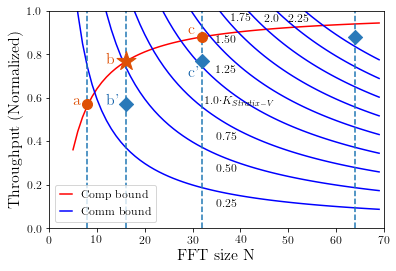

In [129]:
"""
ROOFLINE MODEL:
* Redline: computation bound --> given some amount of logic resources, the max throughput assuming infinite BW,mem
* Blueline: communication bound --> ignore the complexity for different N, the max throughput assuming some amount of logic,BW and mem.
"""

-

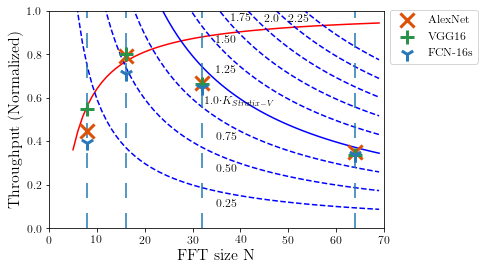

In [123]:
"""
ROOFLINE MODEL:
* Redline: computation bound --> given some amount of logic resources, the max throughput assuming infinite BW,mem
* Blueline: communication bound --> ignore the complexity for different N, the max throughput assuming some amount of logic,BW and mem.
"""

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True



from matplotlib.pyplot import cm

cmap_autumn = plt.get_cmap('autumn')
cmap_R = plt.get_cmap('Oranges')
cmap_G = plt.get_cmap('Greens')
cmap_B = plt.get_cmap('Blues')

num_color = 10
colors_autumn = [cmap_autumn(i) for i in np.linspace(0,1,num_color)]
colors_R = [cmap_R(i) for i in np.linspace(0.1,0.8,num_color)]
colors_G = [cmap_G(i) for i in np.linspace(0.1,0.8,num_color)]
colors_B = [cmap_B(i) for i in np.linspace(0.1,0.8,num_color)]

maxn = 70


DSP = 256
BW = 12      # pixels per clk
MEM = 4.1e6      # bytes

DspPerPixel = 1
BytePerCpxWord = 4 # for kernel, so we need cpx word

asymp1 = lambda N,k,device_const: N*(device_const**-1.*DSP/BW/MEM**0.5)*(2*BytePerCpxWord**0.5/DspPerPixel)
asymp2 = lambda N,k: (N/(N-k+1))**2


N_range = np.arange(5,maxn)
k = 3.0
y2 = [1./asymp2(Ni,k) for Ni in N_range]

fig,ax = plt.subplots()

line2 = [N_range,y2,'r-']
multi_series = line2
for device_const in [0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25]:
    y1 = [1./asymp1(Ni,None,device_const) for Ni in N_range]
    if device_const == 1.:
        multi_series += [N_range,y1,'b-']
    else:
        multi_series += [N_range,y1,'b--']


plt.plot(*multi_series)

for N in [8,16,32,64]:
    ax.axvline(N,linestyle='dashed',dashes=(10,10))

ax.set_xlabel('FFT size N',fontsize=16)
ax.set_ylabel('Throughput (Normalized)',fontsize=16)

plt.text(35,0.10,'0.25',size=12)
plt.text(35,0.26,'0.50',size=12)
plt.text(35,0.41,'0.75',size=12)
plt.text(32.5,0.57,'1.0'+r'$\cdot K_{Stratix-V}$',size=12)
plt.text(35,0.71,'1.25',size=12)
plt.text(35,0.85,'1.50',size=12)
plt.text(38,0.95,'1.75',size=12)
plt.text(45,0.95,'2.0',size=12)
plt.text(50,0.95,'2.25',size=12)




lw=3
max_AlexNet = 984.37
max_VGG16 = 835.59
max_FCN16s = 781.91

### AlexNet data
ax.scatter([8,16,32,64],np.array([439.86,780.62,655.50,343.05])/max_AlexNet,
            200,marker='x',color=colors_R[8],zorder=100,linewidth=lw,label='AlexNet')
### VGG data
ax.scatter([8,16,32,64],np.array([458.13,669.06,552.62,279.3])/max_VGG16,
           200,marker='+',color=colors_G[8],zorder=100,linewidth=lw,label='VGG16')
### FCN16s data
ax.scatter([8,16,32,64],np.array([304.31,552.06,504.95,262.1])/max_FCN16s,
           200,marker='1',color=colors_B[8],zorder=100,linewidth=lw,label='FCN-16s')

ax.legend(bbox_to_anchor=(1., 1.03))

axes = plt.gca()
axes.set_ylim([0,1])
axes.set_xlim([0,maxn])
plt.show()

#plt.savefig('../writing/FPGA18_acc/design_chart_verify.pdf',format='pdf',dpi=300,bbox_inches='tight')

### import numpy as np
import matplotlib.pyplot as plt

alpha = 1.0
beta = 1.0
mu = 1.0

DSP = 256
BW = 12.5      # pixels per clk
MEM = 4e6      # bytes

DspPerCpxMac = 1
BytePerCpxWord = 4

actual = lambda N,k,alpha,beta,mu:\
            (N/(N-k+1))**2*(BytePerCpxWord/MEM)**0.5\
            *N/min(0.5*(beta*BW),(alpha*DSP)/DspPerCpxMac*(BytePerCpxWord/(mu*MEM))**0.5*N)
        
N_range = np.arange(5,64)
k = 3.

multi_series = []
for alpha in [1.0]:#(np.arange(10)+1.)/10.:
    y = [1./actual(Ni,k,alpha,beta,mu) for Ni in N_range]
    multi_series += [N_range,y,'b']

plt.clf()
plt.plot(*multi_series)

plt.axvline(8)
plt.axvline(16)
plt.axvline(32)
plt.ylabel('-')
axes = plt.gca()
axes.set_ylim([0,250])
plt.show()

### CaP Effect

max cap gain over oaa: 2.31337798105


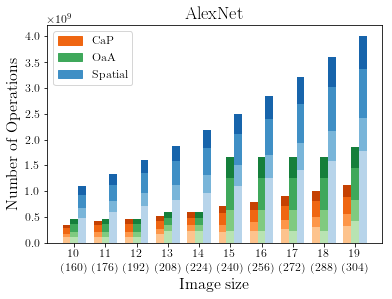

In [117]:
"""
ALEXNET FEATURE EXTRACTION
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True



cmap_cap = plt.get_cmap('Oranges')
cmap_oaa = plt.get_cmap('Greens')
cmap_spa = plt.get_cmap('Blues')

num_cnn = 10
l_img = (np.arange(num_cnn)+10)*16.

cap = np.load('../config_cnn/AlexNet_limg_sweep/CaP_complexity.npy')
oaa = np.load('../config_cnn/AlexNet_limg_sweep/OaA_complexity.npy')
spa = np.load('../config_cnn/AlexNet_limg_sweep/SPA_complexity.npy')

num_layers = cap.shape[0]
colors_cap = [cmap_cap(i) for i in np.linspace(0.3,0.8,num_layers)]
colors_oaa = [cmap_oaa(i) for i in np.linspace(0.3,0.8,num_layers)]
colors_spa = [cmap_spa(i) for i in np.linspace(0.3,0.8,num_layers)]

bottom_cap = np.array([0.]*num_cnn)
bottom_oaa = np.array([0.]*num_cnn)
bottom_spa = np.array([0.]*num_cnn)
width = 4
for li in range(num_layers):
    plt.bar(l_img-width,cap[li],width,color=colors_cap[li],bottom=bottom_cap)
    plt.bar(l_img,oaa[li],width,color=colors_oaa[li],bottom=bottom_oaa)
    plt.bar(l_img+width,spa[li],width,color=colors_spa[li],bottom=bottom_spa)
    bottom_cap += cap[li]
    bottom_oaa += oaa[li]
    bottom_spa += spa[li]
    if li == 3:
        print 'max cap gain over oaa: {}'.format(bottom_oaa[5]/bottom_cap[5])

plt.xticks(l_img,['{}\n({})'.format(i+10,int(li)) for i,li in enumerate(l_img)])
plt.xlabel('Image size',fontsize=16)
plt.ylabel('Number of Operations',fontsize=16)
plt.title('AlexNet',fontsize=18)

cap_patch = mpatches.Patch(color=colors_cap[2], label='CaP')
oaa_patch = mpatches.Patch(color=colors_oaa[2], label='OaA')
spa_patch = mpatches.Patch(color=colors_spa[2], label='Spatial')
plt.legend(handles=[cap_patch,oaa_patch,spa_patch])
plt.show()
#plt.savefig('../writing/FPGA18_acc/alexnet_cap1.pdf',format='pdf',dpi=300,bbox_inches='tight')
# N=240, 2.313x
# d = 6 12 1 2 1 5 4 6 5 2

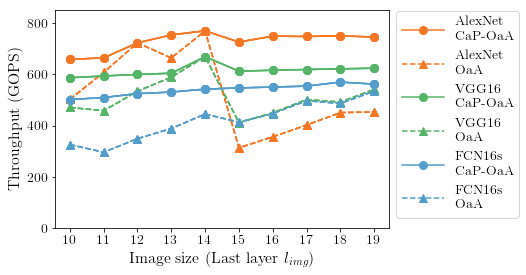

In [113]:
"""
ALEXNET FEATURE EXTRACTION
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 14
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True



cmap_alexnet = plt.get_cmap('Oranges')
cmap_vgg16 = plt.get_cmap('Greens')
cmap_fcn16s = plt.get_cmap('Blues')

colors_alexnet = [cmap_alexnet(i) for i in np.linspace(0.3,0.8,10)]
colors_vgg16 = [cmap_vgg16(i) for i in np.linspace(0.3,0.8,10)]
colors_fcn16s = [cmap_fcn16s(i) for i in np.linspace(0.3,0.8,10)]


num_cnn = 10
l_img = (np.arange(num_cnn)+10)*16.

# fold: 
alexnet_cap = np.array(np.array([658.8,664.6,723.2,754.4,770.4,726.4,749.6,748.2,751.0,745.9]))
alexnet_oaa = np.array(np.array([502.2,607.7,723.2,664.2,770.4,312.9,356.0,401.9,450.6,453.3]))
# fold: 
vgg16_cap = np.array([586.9,593.8,599.7,604.7,669.1,612.8,616.2,619.1,621.8,624.2])
vgg16_oaa = np.array([470.8,458.1,534.5,589.1,669.1,411.6,450.0,501.3,492.0,541.2])
# fold: 
fcn16s_cap = np.array([501.8,509.4,525.0,530.9,542.5,547.1,550.7,554.1,569.9,562.1])
fcn16s_oaa = np.array([325.8,295.6,348.9,388.5,445.0,413.3,446.8,497.2,486.4,534.6])

#alexnet_cap_avg = [alexnet_cap.sum()/len(alexnet_cap)]*len(alexnet_cap)
#alexnet_oaa_avg = [alexnet_oaa.sum()/len(alexnet_oaa)]*len(alexnet_oaa)
#vgg16_cap_avg = [vgg16_cap.sum()/len(vgg16_cap)]*len(vgg16_cap)
#vgg16_oaa_avg = [vgg16_oaa.sum()/len(vgg16_oaa)]*len(vgg16_oaa)
#fcn16s_cap_avg = [fcn16s_cap.sum()/len(fcn16s_cap)]*len(fcn16s_cap)
#fcn16s_oaa_avg = [fcn16s_oaa.sum()/len(fcn16s_oaa)]*len(fcn16s_oaa)

width = 4
plt.plot(l_img,alexnet_cap,color=colors_alexnet[5],marker='o',linestyle='-',markersize=8)
plt.plot(l_img,alexnet_oaa,color=colors_alexnet[5],marker='^',linestyle='--',markersize=8)
plt.plot(l_img,vgg16_cap,color=colors_vgg16[5],marker='o',linestyle='-',markersize=8)
plt.plot(l_img,vgg16_oaa,color=colors_vgg16[5],marker='^',linestyle='--',markersize=8)
plt.plot(l_img,fcn16s_cap,color=colors_fcn16s[5],marker='o',linestyle='-',markersize=8)
plt.plot(l_img,fcn16s_oaa,color=colors_fcn16s[5],marker='^',linestyle='--',markersize=8)

plt.xticks(l_img,[str(int(i)) for i in l_img])
plt.xlabel(r'Image size (Last layer $l_{img}$)',fontsize=16)
plt.ylabel('Throughput (GOPS)',fontsize=16)
plt.xticks(l_img,['{}'.format(i+10) for i,li in enumerate(l_img)])

alexnet_patch = mpatches.Patch(color=colors_alexnet[5], label='AlexNet')
vgg16_patch = mpatches.Patch(color=colors_vgg16[5], label='VGG16')
fcn16s_patch = mpatches.Patch(color=colors_fcn16s[5], label='FCN-16s')

axes = plt.gca()
axes.set_ylim([0,850])
#plt.legend(handles=[alexnet_patch,vgg16_patch,fcn16s_patch])
plt.legend(['AlexNet\nCaP-OaA','AlexNet\nOaA','VGG16\nCaP-OaA','VGG16\nOaA','FCN16s\nCaP-OaA','FCN16s\nOaA'],
           bbox_to_anchor=(1., 1.03),handlelength=3,fontsize=14)
plt.show()
#plt.savefig('../writing/FPGA18_acc/throughput_cap.pdf',format='pdf',dpi=300,bbox_inches='tight')

max cap gain over oaa: 1.4994956467


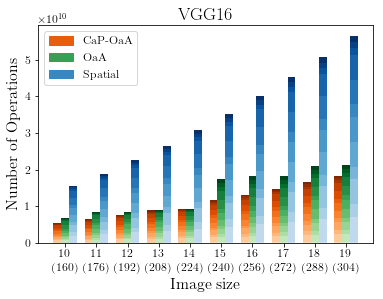

In [109]:
"""
VGG16 FEATURE EXTRACTION
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True



cmap_cap = plt.get_cmap('Oranges')
cmap_oaa = plt.get_cmap('Greens')
cmap_spa = plt.get_cmap('Blues')

num_cnn = 10
l_img = (np.arange(num_cnn)+10)*16.

cap = np.load('../config_cnn/VGG16_limg_sweep/CaP_complexity.npy')
oaa = np.load('../config_cnn/VGG16_limg_sweep/OaA_complexity.npy')
spa = np.load('../config_cnn/VGG16_limg_sweep/SPA_complexity.npy')

num_layers = cap.shape[0]
colors_cap = [cmap_cap(i) for i in np.linspace(0.2,1.0,num_layers)]
colors_oaa = [cmap_oaa(i) for i in np.linspace(0.2,1.0,num_layers)]
colors_spa = [cmap_spa(i) for i in np.linspace(0.2,1.0,num_layers)]


bottom_cap = np.array([0.]*num_cnn)
bottom_oaa = np.array([0.]*num_cnn)
bottom_spa = np.array([0.]*num_cnn)
width = 4
for li in range(num_layers):
    plt.bar(l_img-width,cap[li],width,color=colors_cap[li],bottom=bottom_cap)
    plt.bar(l_img,oaa[li],width,color=colors_oaa[li],bottom=bottom_oaa)
    plt.bar(l_img+width,spa[li],width,color=colors_spa[li],bottom=bottom_spa)
    bottom_cap += cap[li]
    bottom_oaa += oaa[li]
    bottom_spa += spa[li]
    if li == 12:
        print 'max cap gain over oaa: {}'.format(bottom_oaa[5]/bottom_cap[5])
    
plt.xticks(l_img,['{}\n({})'.format(i+10,int(li)) for i,li in enumerate(l_img)])
plt.xlabel('Image size',fontsize=16)
plt.ylabel('Number of Operations',fontsize=16)
plt.title('VGG16',fontsize=18)

cap_patch = mpatches.Patch(color=colors_cap[7], label='CaP-OaA')
oaa_patch = mpatches.Patch(color=colors_oaa[7], label='OaA')
spa_patch = mpatches.Patch(color=colors_spa[7], label='Spatial')
plt.legend(handles=[cap_patch,oaa_patch,spa_patch])
#plt.savefig('../writing/FPGA18_acc/vgg16_cap1.pdf',format='pdf',dpi=300,bbox_inches='tight')
plt.show()

# N=240, 1.499x
# d = 7 14 7 14 1 14 7 14 7 14

max cap gain over oaa: 1.7307523777


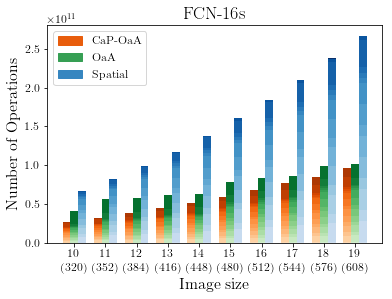

In [103]:
"""
FCN-16s segmentation
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True



cmap_cap = plt.get_cmap('Oranges')
cmap_oaa = plt.get_cmap('Greens')
cmap_spa = plt.get_cmap('Blues')

num_cnn = 10
l_img = (np.arange(num_cnn)+10)*32.

cap = np.load('../config_cnn/FCN16s_limg_sweep/CaP_complexity.npy')
oaa = np.load('../config_cnn/FCN16s_limg_sweep/OaA_complexity.npy')
spa = np.load('../config_cnn/FCN16s_limg_sweep/SPA_complexity.npy')

num_layers = cap.shape[0]
colors_cap = [cmap_cap(i) for i in np.linspace(0.2,1.0,num_layers)]
colors_oaa = [cmap_oaa(i) for i in np.linspace(0.2,1.0,num_layers)]
colors_spa = [cmap_spa(i) for i in np.linspace(0.2,1.0,num_layers)]


#import pdb;pdb.set_trace()
bottom_cap = np.array([0.]*num_cnn)
bottom_oaa = np.array([0.]*num_cnn)
bottom_spa = np.array([0.]*num_cnn)
width = 8
for li in range(num_layers):
    plt.bar(l_img-width,cap[li],width,color=colors_cap[li],bottom=bottom_cap)
    plt.bar(l_img,oaa[li],width,color=colors_oaa[li],bottom=bottom_oaa)
    plt.bar(l_img+width,spa[li],width,color=colors_spa[li],bottom=bottom_spa)
    bottom_cap += cap[li]
    bottom_oaa += oaa[li]
    bottom_spa += spa[li]
    if li == 17:
        print 'max cap gain over oaa: {}'.format(bottom_oaa[1]/bottom_cap[1])


plt.xticks(l_img,['{}\n({})'.format(i+10,int(li)) for i,li in enumerate(l_img)])
plt.xlabel('Image size',fontsize=16)
plt.ylabel('Number of Operations',fontsize=16)
plt.title('FCN-16s',fontsize=18)

cap_patch = mpatches.Patch(color=colors_cap[10], label='CaP-OaA')
oaa_patch = mpatches.Patch(color=colors_oaa[10], label='OaA')
spa_patch = mpatches.Patch(color=colors_spa[10], label='Spatial')
plt.legend(handles=[cap_patch,oaa_patch,spa_patch])
plt.show()
#plt.savefig('../writing/FPGA18_acc/fcn16s_cap1.pdf',format='pdf',dpi=300,bbox_inches='tight')
# N=352: 1.73x
# d = 12 12 2 9 8 14 3 13 4 11

In [14]:
import numpy as np

### fin,fout,limg,lkern,N,folding for FDCNN
### fin,fout,limg,lkern,stride,padding for spatial conv
AlexNet = np.array(
    [[96,256,27,5,0,1],
    [256,384,13,3,0,1],
    [384,384,13,3,0,1],
    [384,256,13,3,0,1]])

VGG16 = np.array(
    [[3,64,224,3,0,1],
    [64,64,224,3,0,1],
    [64,128,112,3,0,1],
    [128,128,112,3,0,1],
    [128,256,56,3,0,1],
    [256,256,56,3,0,1],
    [256,256,56,3,0,1],
    [256,512,28,3,0,1],
    [512,512,28,3,0,1],
    [512,512,28,3,0,1],
    [512,512,14,3,0,1],
    [512,512,14,3,0,1],
    [512,512,14,3,0,1]])
     
FCN = np.array(
    [[3,64,500,3,0,1],
    [64,64,500,3,0,1],
    [64,128,250,3,0,1],
    [128,128,250,3,0,1],
    [128,256,125,3,0,1],
    [256,256,125,3,0,1],
    [256,256,125,3,0,1],
    [256,512,63,3,0,1],
    [512,512,63,3,0,1],
    [512,512,63,3,0,1],
    [512,512,32,3,0,1],
    [512,512,32,3,0,1],
    [512,512,32,3,0,1],
    [512,4096,16,7,0,1],
    [4096,4096,10,1,0,1],
    [4096,21,10,1,0,1],
    [21,21,22,4,0,1],
    [512,21,32,1,0,1]])

In [17]:
import sys
sys.path.insert(0,'../../../lib_py')
sys.path.insert(0,'../py_dse')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 20
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True




cmap_autumn = plt.get_cmap('autumn')
cmap_R = plt.get_cmap('Oranges')
cmap_G = plt.get_cmap('Greens')
cmap_B = plt.get_cmap('Blues')

num_color = 10
colors_autumn = [cmap_autumn(i) for i in np.linspace(0,1,num_color)]
colors_R = [cmap_R(i) for i in np.linspace(0.1,0.8,num_color)]
colors_G = [cmap_G(i) for i in np.linspace(0.1,0.8,num_color)]
colors_B = [cmap_B(i) for i in np.linspace(0.1,0.8,num_color)]


# complexity: 8,16,32,64
AlexNet_complexity = np.array([0.58, 0.31, 0.80, 3.20])
VGG16_complexity = np.array([0.47, 0.30, 0.38, 0.98])
FCN16s_complexity = np.array([0.67, 0.44, 0.83, 2.31])

N_label = [8,16,32,64]
N_loc = np.array([1,2,3,4])
width = 0.22
color_selected = [3,5,7]

fig,ax = plt.subplots()
rect1 = ax.bar(N_loc-width,AlexNet_complexity,width,color=colors_autumn[color_selected[0]])
rect2 = ax.bar(N_loc,VGG16_complexity,width,color=colors_autumn[color_selected[1]])
rect3 = ax.bar(N_loc+width,FCN16s_complexity,width,color=colors_autumn[color_selected[2]])

plt.xticks(N_loc,['8','16','32','64'])
ax.set_yticks([0,0.5,1.0,1.5,2,2.5,3.0,3.5])
#plt.axes().set_aspect(1.0)
#plt.title('OaA Computation Complexity for Various N')
ax.set_xlabel('FFT Size',fontsize=20)
ax.set_ylabel('Normalized Number of Ops',fontsize=20)
#ax.legend([rect1[0],rect2[0],rect3[0]],['AlexNet','VGG16','FCN-16s'])
ax.set_ylim([0,2])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+0.1,
                '%3.2f' % height,
                ha='center', va='bottom',rotation=90)
plt.axhline(1,linestyle='dashed',color=colors_G[9],linewidth=1)

#autolabel(rect1)
#autolabel(rect2)
#autolabel(rect3)

ax.set_aspect(2.5)
plt.title('OaA',fontsize=22)
#plt.show()
plt.savefig('Presen/replots/oaa_complexity2.png',format='png',dpi=300,bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'Presen/replots/oaa_complexity2.png'

In [36]:
a = np.array([[1],[2]])

In [18]:
b = a.T

In [19]:
b[0] = 1

In [10]:
30**2/32**2

0.87890625

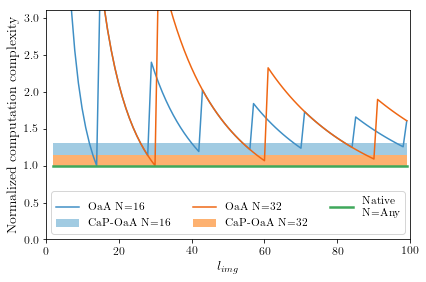

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

cmap_orange = plt.get_cmap('Oranges')
cmap_green = plt.get_cmap('Greens')
cmap_blue = plt.get_cmap('Blues')

colors_orange = [cmap_orange(i) for i in np.linspace(0.1,0.9,10)]
colors_green = [cmap_green(i) for i in np.linspace(0.1,0.9,10)]
colors_blue = [cmap_blue(i) for i in np.linspace(0.1,0.9,10)]


limg = np.array(range(2,100))#.astype(np.float)
lkern = 3.

oaa = lambda _N,_limg: (np.ceil(_limg/(_N-lkern+1))*_N/(_limg+lkern-1))**2

cap = lambda _N,limg: [1./(1.-(lkern-1)/_N)**2]*len(limg)

native = lambda limg: [1.]*len(limg)

fig,ax = plt.subplots()

N = 16.
ax.plot(limg,oaa(N,limg),color=colors_blue[6],label='OaA N=16')
#ax.plot(limg,cap(N,limg),color=colors_blue[6])
ax.fill_between(limg,cap(N,limg),native(limg),facecolor=colors_blue[3],label='CaP-OaA N=16')

N = 32.
ax.plot(limg,oaa(N,limg),color=colors_orange[6],label='OaA N=32')
#ax.plot(limg,cap(N,limg),color=colors_orange[6])
ax.fill_between(limg,cap(N,limg),native(limg),facecolor=colors_orange[3],label='CaP-OaA N=32')

ax.plot(limg,native(limg),color=colors_green[6],label='Native\nN=Any',linewidth=2.5)

#plt.savefig('../writing/FPGA18_sub/cap_algo_compare.pdf')
ax.set_ylim([0,3.1])
ax.set_xlim([0,100])

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[3],handles[1],handles[4],handles[2]]
labels = [labels[0],labels[3],labels[1],labels[4],labels[2]]

ax.set_xlabel(r'$l_{img}$',fontsize=14)
ax.set_ylabel('Normalized computation complexity',fontsize=14)

plt.legend(handles,labels,ncol=3,prop={'size':11.5})


fig.set_tight_layout({"pad": 1.})
plt.show()
#plt.savefig('../writing/FPGA18_acc/cap_oaa_native.pdf',format='pdf',dpi=300)

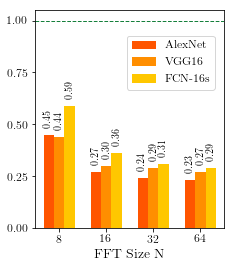

In [89]:
import sys
sys.path.insert(0,'../../../lib_py')
sys.path.insert(0,'../py_dse')
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
#mpl.rcParams['pdf.fonttype'] = 42
#mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

#mpl.rcParams['image.aspect'] = 0.2
#rc('text', usetex=True)

cmap_autumn = plt.get_cmap('autumn')
cmap_R = plt.get_cmap('Oranges')
cmap_G = plt.get_cmap('Greens')
cmap_B = plt.get_cmap('Blues')

num_color = 10
colors_autumn = [cmap_autumn(i) for i in np.linspace(0,1,num_color)]
colors_R = [cmap_R(i) for i in np.linspace(0.1,0.8,num_color)]
colors_G = [cmap_G(i) for i in np.linspace(0.1,0.8,num_color)]
colors_B = [cmap_B(i) for i in np.linspace(0.1,0.8,num_color)]


# complexity: 8,16,32,64
AlexNet_complexity = np.array([0.45, 0.27, 0.24, 0.23])
VGG16_complexity = np.array([0.44, 0.30, 0.29, 0.27])
FCN16s_complexity = np.array([0.59, 0.36, 0.31, 0.29])

N_label = [8,16,32,64]
N_loc = np.array([1,2,3,4])
width = 0.22
color_selected = [3,5,7]

fig,ax = plt.subplots()
rect1 = ax.bar(N_loc-width,AlexNet_complexity,width,color=colors_autumn[color_selected[0]])
rect2 = ax.bar(N_loc,VGG16_complexity,width,color=colors_autumn[color_selected[1]])
rect3 = ax.bar(N_loc+width,FCN16s_complexity,width,color=colors_autumn[color_selected[2]])
plt.xticks(N_loc,['8','16','32','64'])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_xlabel('FFT Size N',fontsize=14)
#ax.set_ylabel('Normalized Number of Ops',fontsize=14)
ax.legend([rect1[0],rect2[0],rect3[0]],['AlexNet','VGG16','FCN-16s'],bbox_to_anchor=(.98,0.91))
ax.set_ylim([0,1.05])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+0.03,
                '%3.2f' % height,
                ha='center', va='bottom',rotation=90)
plt.axhline(1,linestyle='dashed',color=colors_G[9],linewidth=1)

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)

ax.set_aspect(4.4)
plt.show()
#plt.savefig('../writing/FPGA18_acc/cap_complexity.pdf',format='pdf',dpi=300,bbox_inches='tight')